In [60]:
import model
from tune import ModelTune

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

#from imblearn.under_sampling import NearMiss
#from imblearn.combine import SMOTETomek

In [61]:
clean_tf = pd.read_csv('cleaned_tf.csv', index_col='respondent_id')
clean_tl = pd.read_csv('cleaned_tl.csv', index_col='respondent_id')

In [62]:
np.testing.assert_array_equal(clean_tf.index.values, clean_tl.index.values)
train_df = pd.concat([clean_tf, clean_tl], axis=1)

In [63]:
h1n1 = pd.read_csv('cleaned_tl.csv', usecols=['respondent_id', 'h1n1_vaccine'], index_col='respondent_id')
seasonal = pd.read_csv('cleaned_tl.csv', usecols=['respondent_id', 'seasonal_vaccine'], index_col='respondent_id')

***** Logistic Regression *****


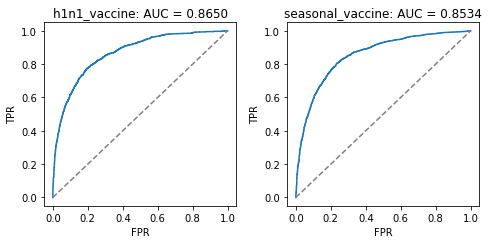

In [64]:
print("***** Logistic Regression *****")
estimator = MultiOutputClassifier(estimator = LogisticRegression())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** K Neighbors Classifier *****


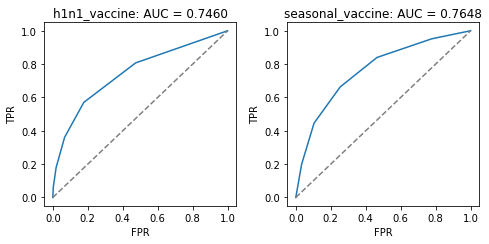

In [5]:
print("***** K Neighbors Classifier *****")
estimator = MultiOutputClassifier(estimator = KNeighborsClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** Decision Tree Classifier *****


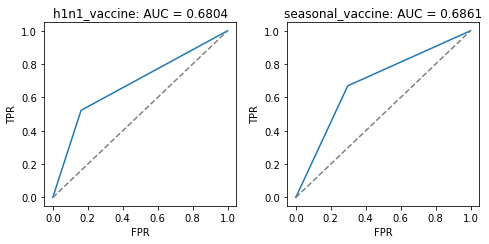

In [13]:
print("***** Decision Tree Classifier *****")
estimator = MultiOutputClassifier(estimator = DecisionTreeClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** Naive Bayes *****


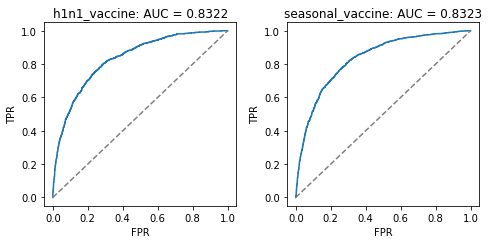

In [15]:
print("***** Naive Bayes *****")
estimator = MultiOutputClassifier(estimator = CategoricalNB())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True, scaler="MinMax")

``` CategoricalNB ```gave an error for having negative values. Hence used MinMax Scaler.

***** Random Forest Classifier *****


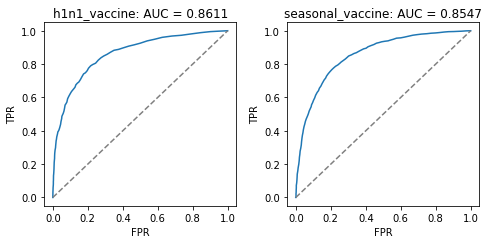

In [19]:
print("***** Random Forest Classifier *****")
estimator = MultiOutputClassifier(estimator = RandomForestClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** Gradient Boosting Classifier *****


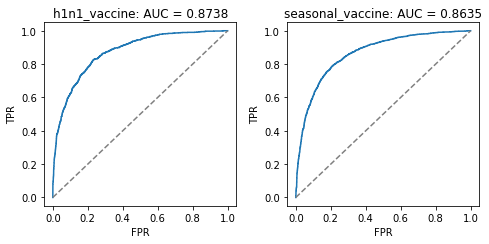

In [21]:
print("***** Gradient Boosting Classifier *****")
estimator = MultiOutputClassifier(estimator = GradientBoostingClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** AdaBoost Classifier *****


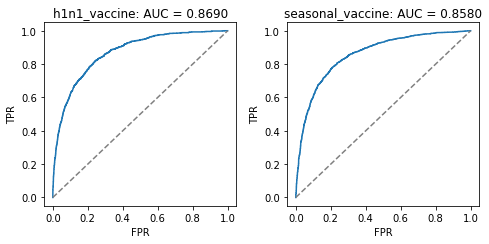

In [23]:
print("***** AdaBoost Classifier *****")
estimator = MultiOutputClassifier(estimator = AdaBoostClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** XGBoost Classifier *****


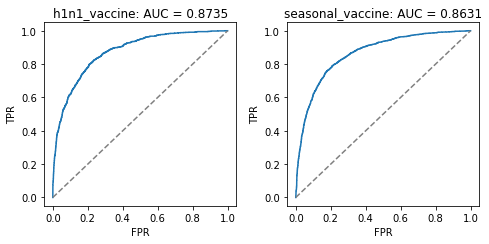

In [6]:
print("***** XGBoost Classifier *****")
estimator = MultiOutputClassifier(estimator = XGBClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

# Single Target Method

## Target : h1n1_vaccine

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
event rate: 21.24536638334519 %


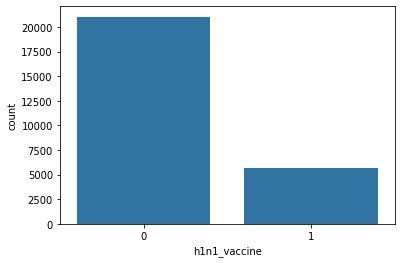

In [78]:
v = h1n1['h1n1_vaccine'].value_counts()
print(v)
print('event rate:', 100*v[1]/(v[0]+v[1]),'%')
sb.countplot(x='h1n1_vaccine', data=h1n1, color=sb.color_palette()[0]);

#### Case 1 : Imbalanced Data - Without Model Tuning

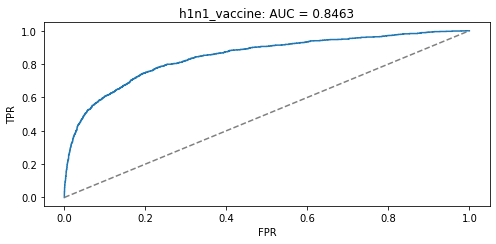

In [4]:
estimator = LogisticRegression()
model.fit_and_estimate(clean_tf, h1n1, estimator,label='h1n1_vaccine')

#### Case 2 : Imbalanced Data - With parameter Tuning

*********** Gradient Boosting Classifier ***********
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Accuracy during search - : 0.858


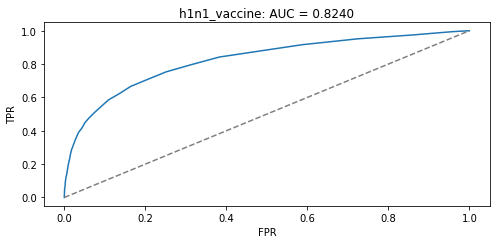

In [4]:
import model
from tune import ModelTune
estimator = ModelTune(clean_tf, h1n1).knn()
model.fit_and_estimate(clean_tf, h1n1, estimator, label='h1n1_vaccine')

#### Case 3 : Balanced Data - without tuning

(9078, 45) (9078, 1)


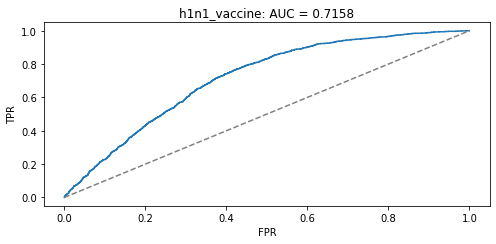

In [14]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res, y_res = nm.fit_sample(X_train, y_train)
print(X_res.shape, y_res.shape)

estimator = LogisticRegression()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

(33608, 45) (33608, 1)


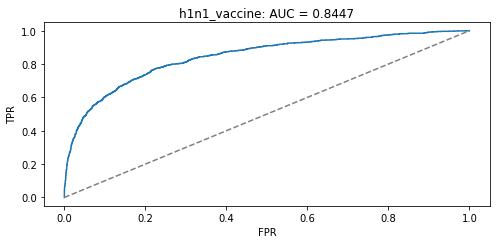

In [15]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
X_res, y_res = smk.fit_sample(X_train, y_train)
print(X_res.shape, y_res.shape)

estimator = LogisticRegression()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

(33652, 45) (33652, 1)


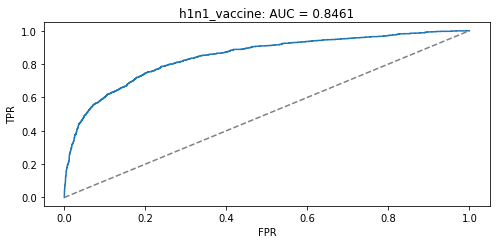

In [16]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()

X_res, y_res = os.fit_sample(X_train, y_train)

print(X_res.shape,y_res.shape)

estimator = LogisticRegression()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

#### Case 4 : Balanced Data - with tuning

(9078, 45) (9078, 1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


Accuracy - : 0.901


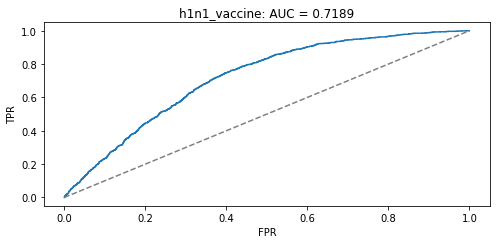

In [62]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res, y_res = nm.fit_sample(X_train, y_train)
print(X_res.shape, y_res.shape)

estimator = tune(X_res, y_res).logreg()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

(33606, 45) (33606, 1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    4.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.3s finished


Accuracy - : 0.875


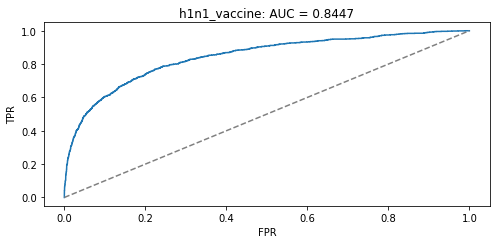

In [63]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
X_res, y_res = smk.fit_sample(X_train, y_train)
print(X_res.shape, y_res.shape)

estimator = tune(X_res, y_res).logreg()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

(33652, 45) (33652, 1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    4.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


Accuracy - : 0.860


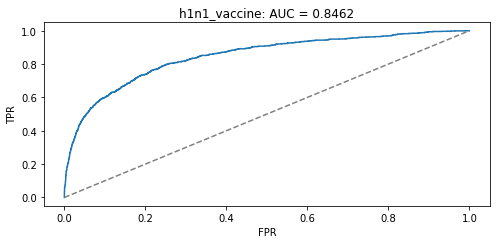

In [64]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()

X_res, y_res = os.fit_sample(X_train, y_train)

print(X_res.shape,y_res.shape)

estimator = tune(X_res, y_res).logreg()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

**Findings:** From above 4 cases, Imbalanced Data with hyperparameter tuning is perfrming better.

## Target : seasonal_vaccine

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(clean_tf.values)

X_train, X_eval, y_train, y_eval = train_test_split(
    X,
    seasonal,
    test_size=0.20,
    shuffle=True,
    stratify=seasonal,
    random_state=0
)

#### Without tuning:

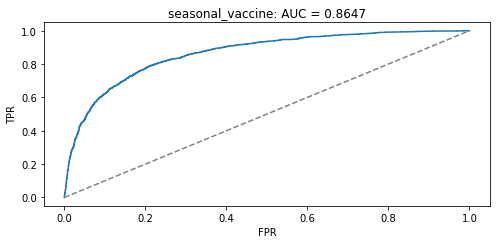

In [38]:
estimator = GradientBoostingClassifier()
model.fit_and_estimate(clean_tf, seasonal, estimator, label='seasonal_vaccine')

#### With tuning

*********** Gradient Boosting Classifier ***********
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.5min finished


Accuracy during search - : 1.000


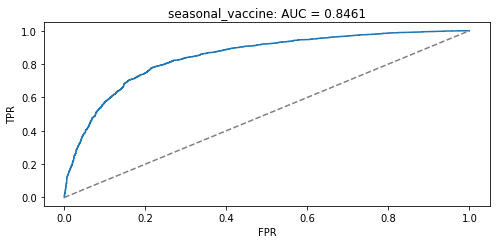

In [37]:
estimator = ModelTune(clean_tf, seasonal).GBC()
model.fit_and_estimate(clean_tf, seasonal, estimator, label='seasonal_vaccine')

In [65]:
clean_test = pd.read_csv('cleaned_test_data.csv', index_col="respondent_id")

In [66]:
clean_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education_Some College,race_Hispanic,race_Other or Multiple,race_White,employment_status_Not in Labor Force,employment_status_Unemployed,"income_poverty_> $75,000",income_poverty_Below Poverty,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,1,0,0,0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,1
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,1,0,0,0,0,0
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
test_probas = estimator.predict_proba(clean_test.values)
test_probas

[array([[0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [9.99914153e-01, 8.58470614e-05],
        ...,
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00]]),
 array([[0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [3.91908728e-13, 1.00000000e+00],
        ...,
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00]])]

In [68]:
submission_df = pd.read_csv('Submission.csv', index_col="respondent_id")
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [69]:
np.testing.assert_array_equal(clean_test.index.values, 
                              submission_df.index.values)

In [70]:
# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,1.000000,1.0
26708,1.000000,1.0
26709,0.000086,1.0
26710,1.000000,1.0
26711,1.000000,1.0


In [71]:
submission_df.to_csv('submission.csv', index=True)